In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from pysas import World, waveread

In [2]:
signal, samplingrate, _ = waveread("test/cmu_arctic/arctic_a0001.wav")

In [3]:
world = World(samplingrate)

In [4]:
f0,spec_mat,c = world.analyze(signal)

In [33]:
len(f0)

648

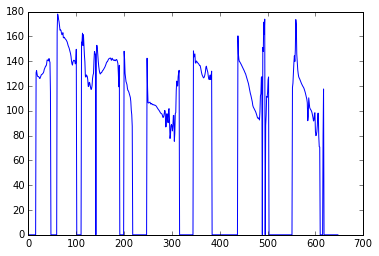

In [34]:
plt.plot(f0)

In [37]:
spec = spec_mat[300]

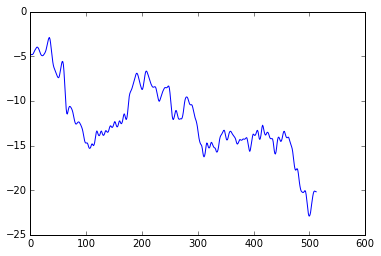

In [38]:
plt.plot(np.log(spec))

In [39]:
from pysas.mcep import spec2mcep, mcep2spec, mcep2coef, coef2mcep, estimate_alpha

In [40]:
alpha = round(estimate_alpha(samplingrate), 3)
alpha

0.41

In [41]:
mcep = spec2mcep(spec, 24, alpha)

In [42]:
spec2 = mcep2spec(mcep, alpha, world.fftsize())

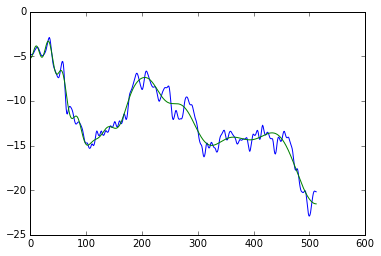

In [43]:
plt.plot(np.log(spec))
plt.plot(np.log(spec2[:world.envelopesize()]))

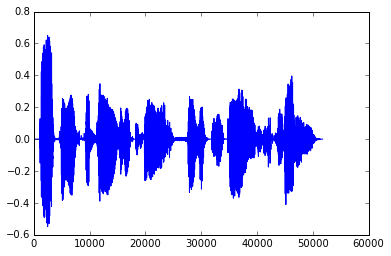

In [48]:
plt.plot(signal)

In [44]:
out = world.synthesis(f0,spec_mat,c)

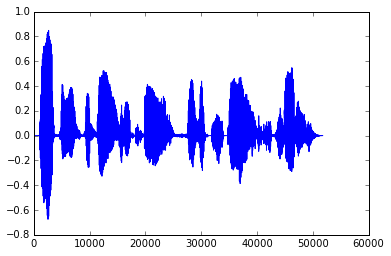

In [45]:
plt.plot(out)

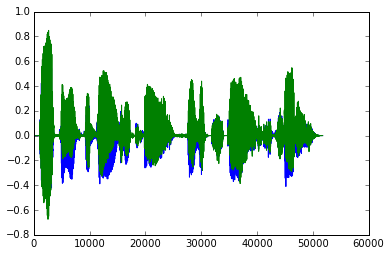

In [46]:
plt.plot(signal)
plt.plot(out)

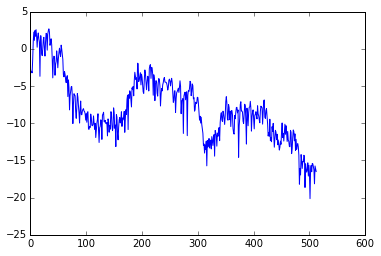

In [47]:
i = 80* 300
windowsize = 1024
sig = signal[i:i+windowsize] * np.hanning(windowsize)
power_spectrum = (np.absolute(np.fft.fft(sig)) ** 2)[:(windowsize>>1) + 1]
plt.plot(np.log(power_spectrum))

In [50]:
fft_mcep = spec2mcep(power_spectrum, 20, alpha)
reconst_pspec = mcep2spec(fft_mcep, alpha, windowsize)

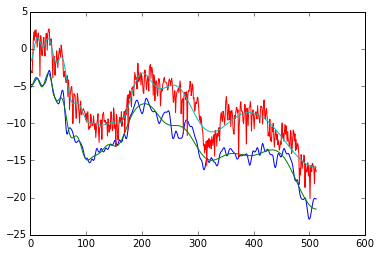

In [51]:
plt.plot(np.log(spec))
plt.plot(np.log(spec2))
plt.plot(np.log(power_spectrum))
plt.plot(np.log(reconst_pspec))

In [53]:
coef = mcep2coef(fft_mcep, alpha)
reconst_mcep = coef2mcep(coef, alpha)

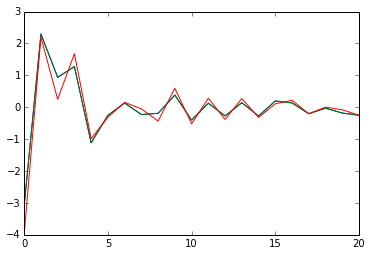

In [54]:
plt.plot(fft_mcep)
plt.plot(reconst_mcep)
plt.plot(coef)

In [5]:
from pysas.excite import ExcitePulse

In [6]:
ep = ExcitePulse(16000, 80, False)

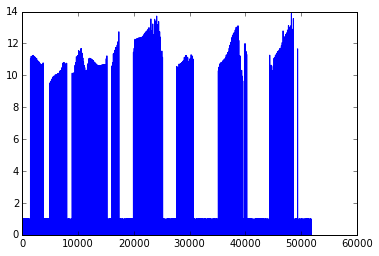

In [8]:
plt.plot(ep.gen(f0))